# Zomato Restaurant Analysis | Data Analytics Project

Short Project Summary

This project analyzes Zomato restaurant data in Bangalore using Python.
The goal is to derive business insights, clean the data, perform EDA, statistical tests, and provide actionable recommendations for food tech businesses.


1.IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

2.Load the dataset

In [3]:
data = pd.read_csv(r"C:\Users\syed9\Desktop\rty\Project_Statistics\Zomato\zomato.csv")

In [4]:
data.index.name = "index"

In [5]:
zomato_data = data.copy()

In [6]:
zomato_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
index,,,,,,,,,,,,,,,,,
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
zomato_data.shape

(51717, 17)

In [8]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

3. DATA CLEANING & PREPROCESSING

In [9]:
#remove duplicates 

zomato_data.duplicated().sum()

np.int64(0)

==> Clean the 'rate' Column
The ‘rate’ column has values like "4.1/5", "NEW", "-", etc

In [10]:
zomato_data['rate'] = zomato_data['rate'].astype(str).str.replace('/5','',regex=False)

In [11]:
zomato_data['rate'] = pd.to_numeric(zomato_data['rate'].replace(['New', '-', 'nan'], np.nan), errors='coerce')

In [12]:
zomato_data['rate'] = zomato_data['rate'].astype(float)

In [13]:
zomato_data['rate'].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

==>Clean the 'approx_cost(for two people)' Column
It contains commas (e.g., "1,200")

In [14]:
zomato_data['approx_cost(for two people)'] = zomato_data['approx_cost(for two people)'].astype(str).str.replace(',','',regex=False)

In [15]:
zomato_data['approx_cost(for two people)'] = zomato_data['approx_cost(for two people)'].astype(float)

In [16]:
zomato_data.rename(columns={'approx_cost(for two people)':'cost'},inplace=True)

==> Drop Unnecessary Columns

In [17]:
zomato_data.drop(['url', 'address', 'phone', 'menu_item', 'reviews_list', 'dish_liked'], axis=1, inplace=True)


==> Convert 'online_order' & 'book_table' to Binary

In [18]:
zomato_data['book_table'] = zomato_data['book_table'].map({'Yes':1,'No':0})
zomato_data['online_order'] = zomato_data['online_order'].map({'Yes':1,'No':0})

==>Handle Null Values

In [19]:
zomato_data.isna().sum()

name                   0
online_order           0
book_table             0
rate               10052
votes                  0
location              21
rest_type            227
cuisines              45
cost                 346
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [20]:
zomato_data.dropna(subset=['rate','cost'],inplace=True)

In [21]:
zomato_data['location'].fillna(zomato_data['location'].mode()[0],inplace=True)
zomato_data['rest_type'].fillna(zomato_data['rest_type'].mode()[0],inplace=True)
zomato_data['rest_type'].fillna(zomato_data['cuisines'].mode()[0],inplace=True)


***Final Sanity Check

In [22]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41418 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             41418 non-null  object 
 1   online_order     41418 non-null  int64  
 2   book_table       41418 non-null  int64  
 3   rate             41418 non-null  float64
 4   votes            41418 non-null  int64  
 5   location         41418 non-null  object 
 6   rest_type        41418 non-null  object 
 7   cuisines         41410 non-null  object 
 8   cost             41418 non-null  float64
 9   listed_in(type)  41418 non-null  object 
 10  listed_in(city)  41418 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 3.8+ MB


In [23]:
zomato_data.describe()

,online_order,book_table,rate,votes,cost
count,41418.000000,41418.000000,41418.000000,41418.000000,41418.000000
mean,0.656864,0.152204,3.700353,351.726013,603.268048
std,0.474762,0.359223,0.440637,882.697962,464.327857
min,0.000000,0.000000,1.800000,0.000000,40.000000
25%,0.000000,0.000000,3.400000,21.000000,300.000000
50%,1.000000,0.000000,3.700000,73.000000,500.000000
75%,1.000000,0.000000,4.000000,277.000000,700.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


In [24]:
zomato_data.isna().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           8
cost               0
listed_in(type)    0
listed_in(city)    0
dtype: int64

In [25]:
zomato_data.dropna(subset=['cuisines'], inplace=True)


In [26]:
zomato_data.isna().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
cost               0
listed_in(type)    0
listed_in(city)    0
dtype: int64

 Save Cleaned Dataset

In [27]:
zomato_data.to_csv('cleaned_zomato_data',index=False)

In [28]:
print("Cleaned dataset saved!")

Cleaned dataset saved!


In [29]:
cleaned_zomato_data = pd.read_csv('cleaned_zomato_data')


In [30]:
cleaned_zomato_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


EDA 

4: Univariate Analysis

==> Categorical Features

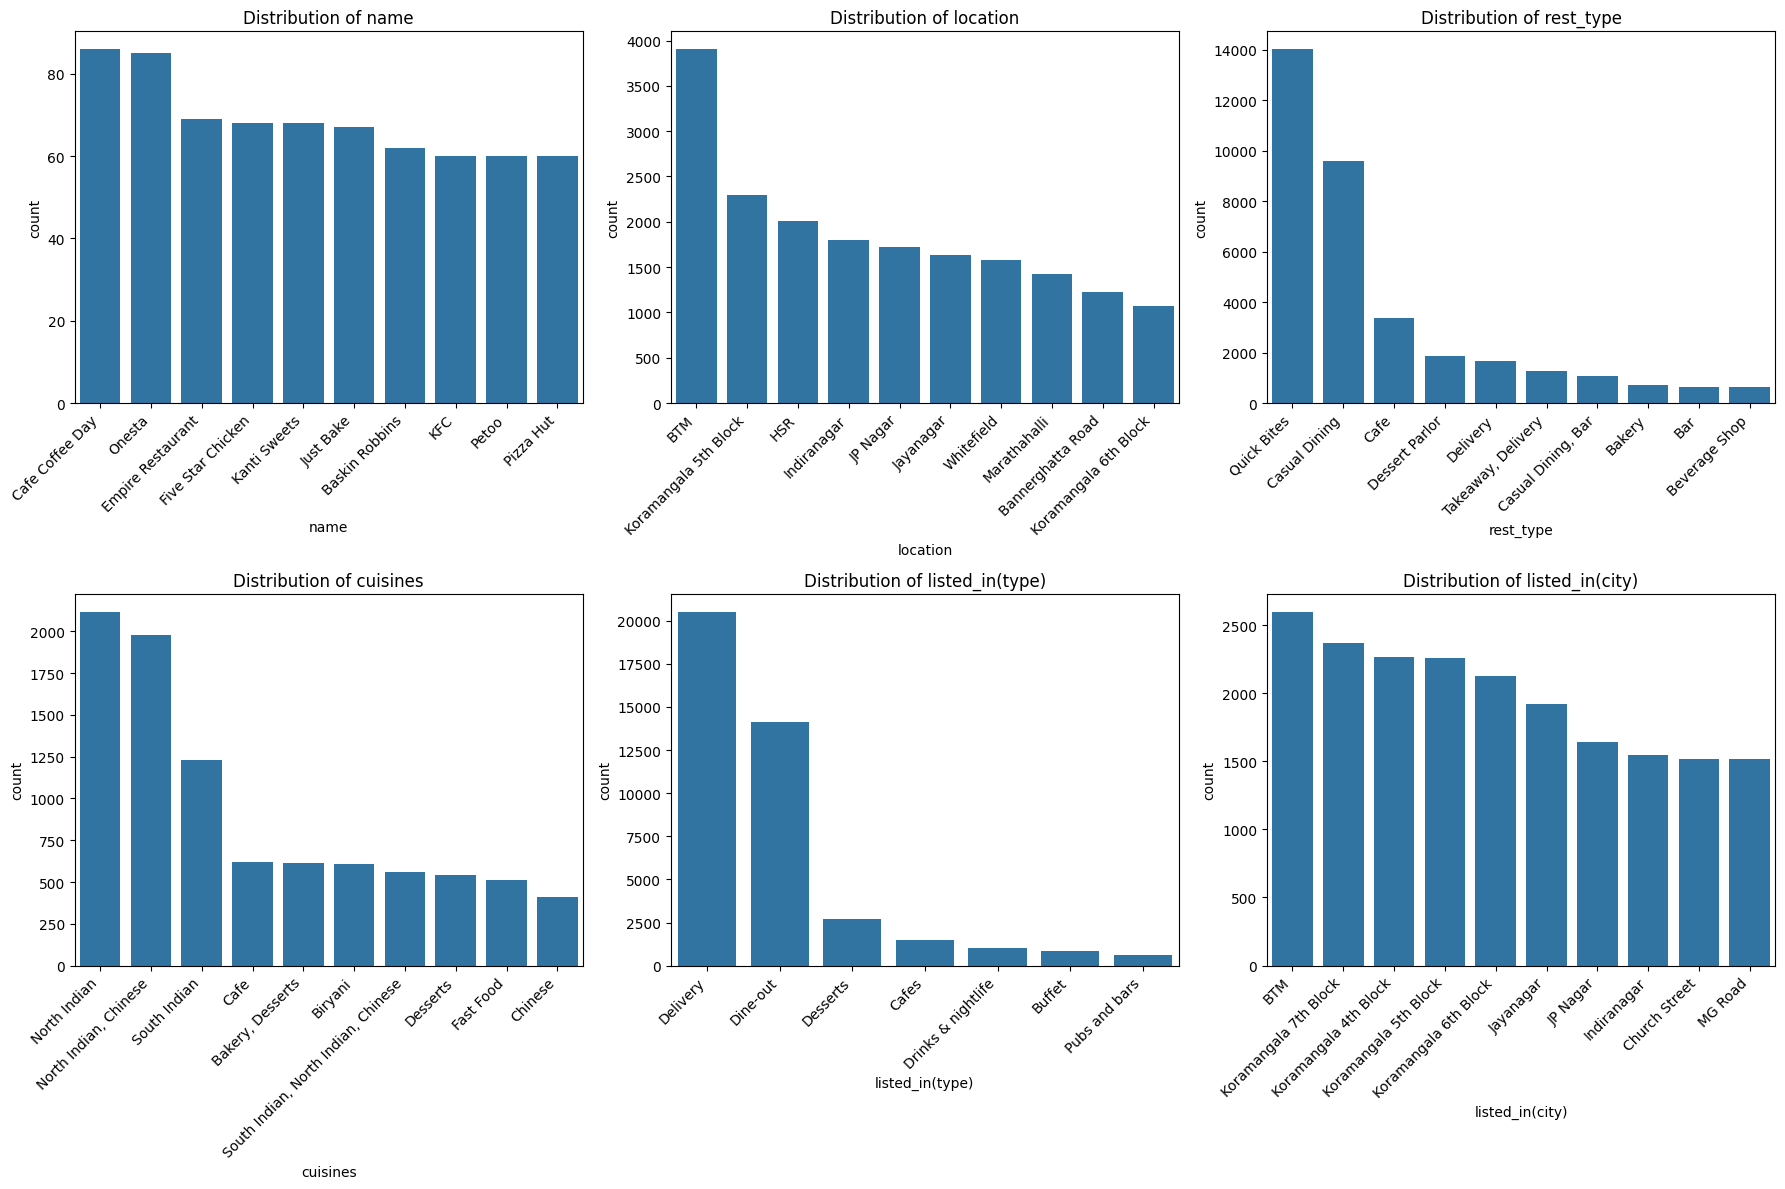

In [31]:
       
cat_col = cleaned_zomato_data.select_dtypes(include=['object']).columns

cols_per_row = 3
rows = math.ceil(len(cat_col)/cols_per_row)
fig,axis = plt.subplots(rows,cols_per_row,figsize=(18,12))
axis = axis.flatten()
for i,col in enumerate(cat_col):
      sns.countplot(data=cleaned_zomato_data,x= col,ax = axis[i],order=cleaned_zomato_data[col].value_counts().index[:10])
      axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45, ha="right")
      axis[i].set_title(f"Distribution of {col}")
      
      
for j in range(len(cat_col),len(axis)):
      fig.delaxes(axis[j])
 
plt.tight_layout()
plt.show()            

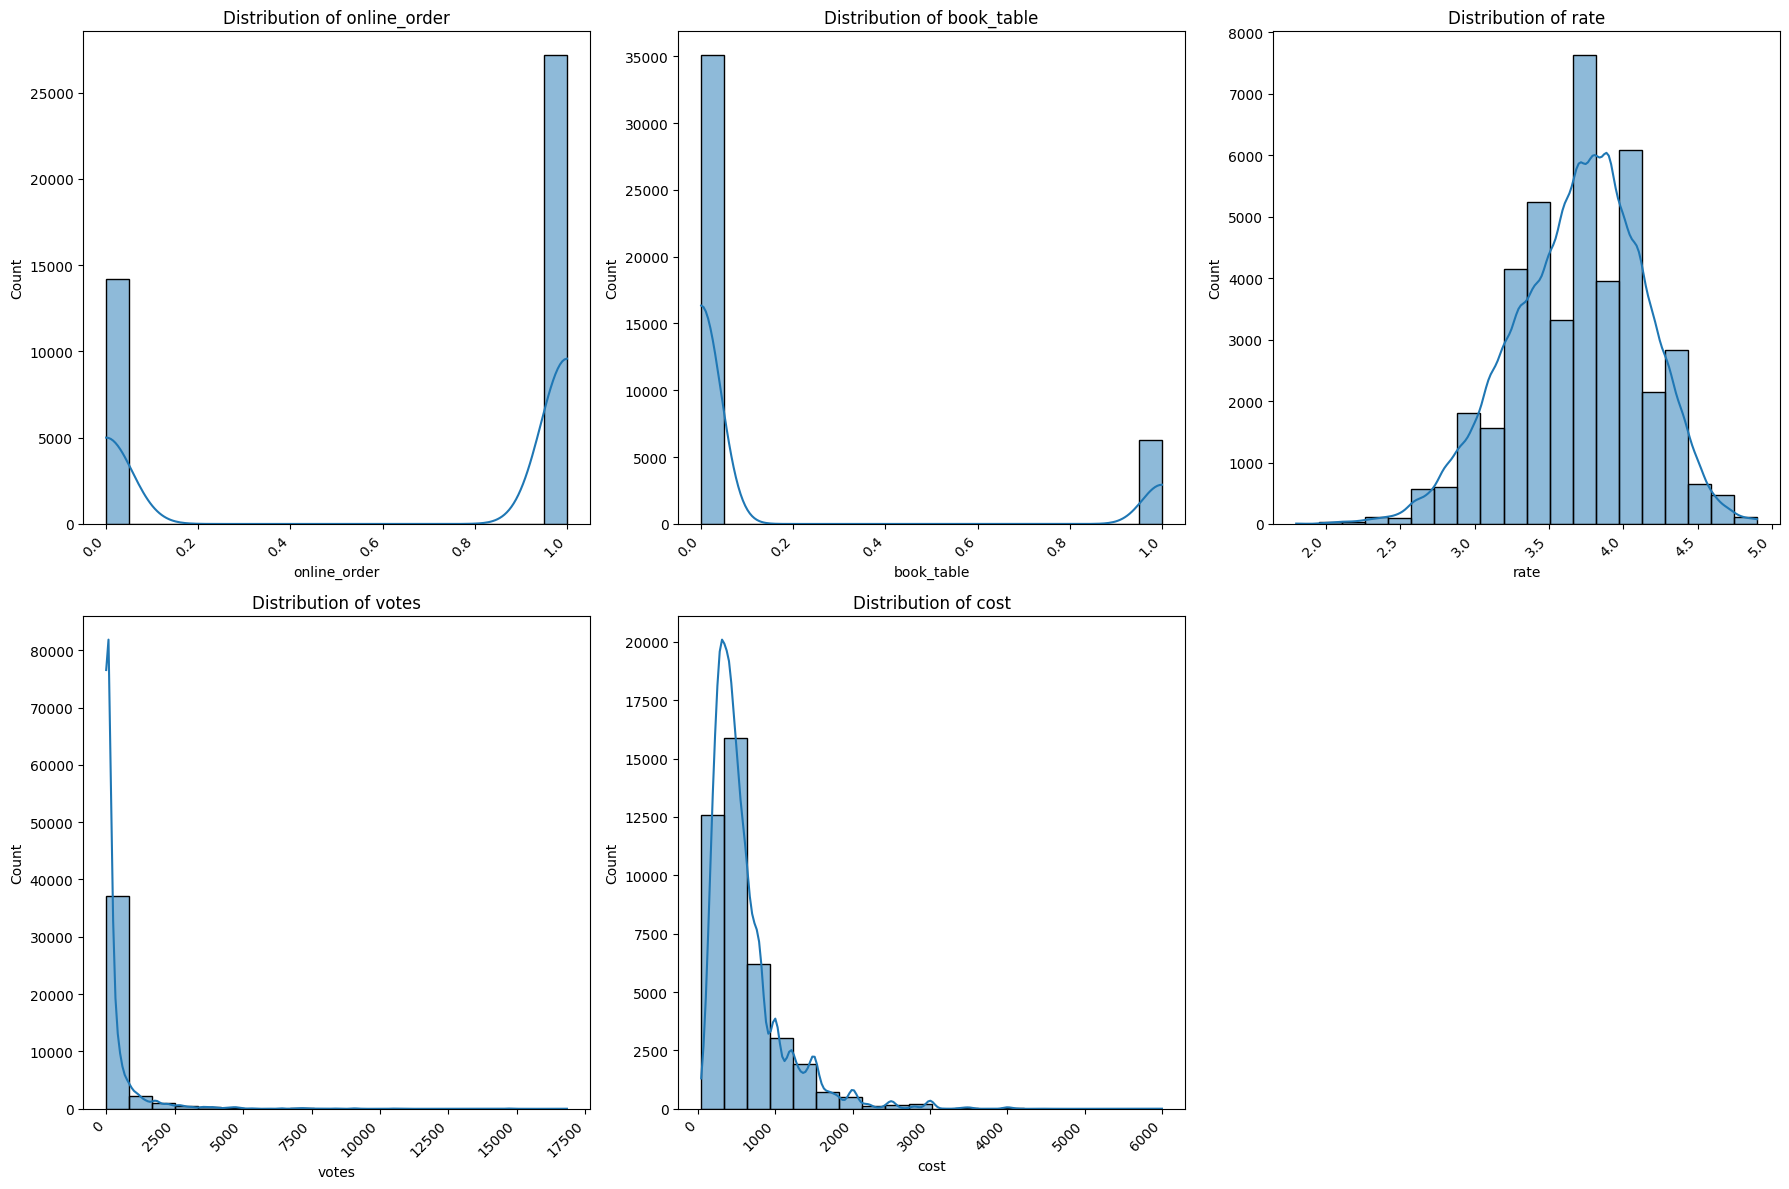

In [32]:
num_col = cleaned_zomato_data.select_dtypes(include=['number']).columns


cols_per_row = 3
rows = math.ceil(len(num_col)/cols_per_row)
fig,axis = plt.subplots(rows,cols_per_row,figsize=(18,12))
axis = axis.flatten()
for i,col in enumerate(num_col):
      sns.histplot(data=cleaned_zomato_data,x= col,ax = axis[i],kde=True,bins=20)
      axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=45, ha="right")
      axis[i].set_title(f"Distribution of {col}")
      
      
for j in range(len(num_col),len(axis)):
      fig.delaxes(axis[j])
 
plt.tight_layout()
plt.show()   


5. Bivariate Analysis

==>. Categorical vs Categorical
We’ll check how two categorical features relate.
Let’s start with online_order vs listed_in(type):

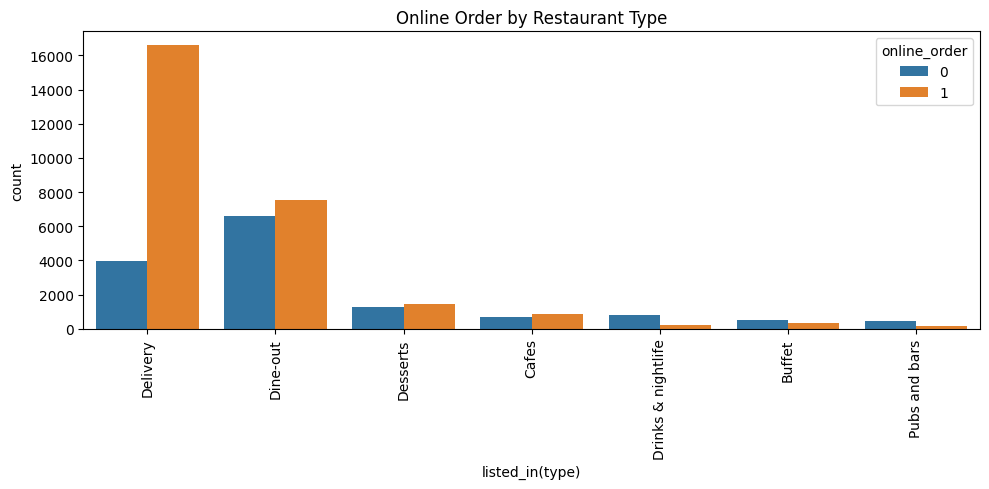

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=cleaned_zomato_data,x = 'listed_in(type)',hue='online_order',order=cleaned_zomato_data['listed_in(type)'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Online Order by Restaurant Type")
plt.tight_layout()
plt.show()

"Which restaurant types are more likely to offer online ordering?"

book_table vs location


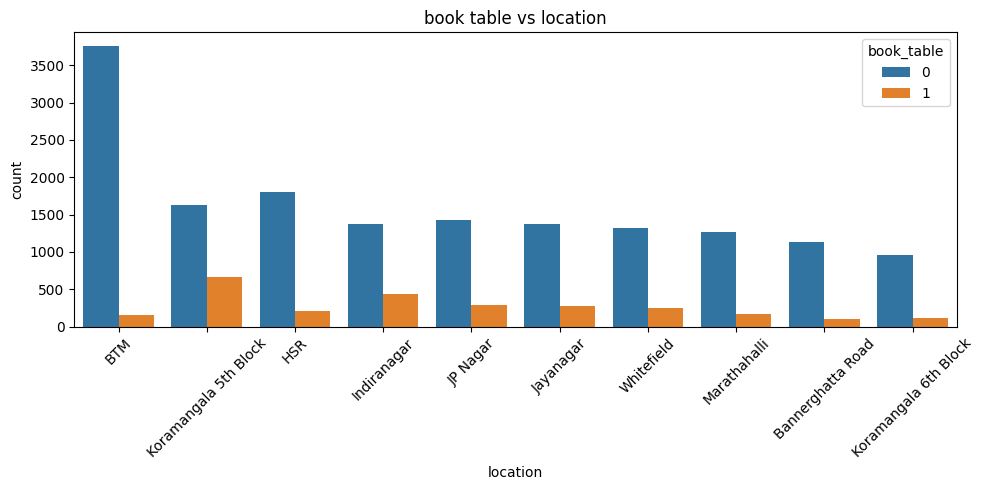

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=cleaned_zomato_data,x = 'location',hue='book_table',order=cleaned_zomato_data['location'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("book table vs location")
plt.tight_layout()
plt.show()

🎯 Insight: This tells you in which locations people prefer restaurants that allow table booking.


book_table vs listed_in(type)

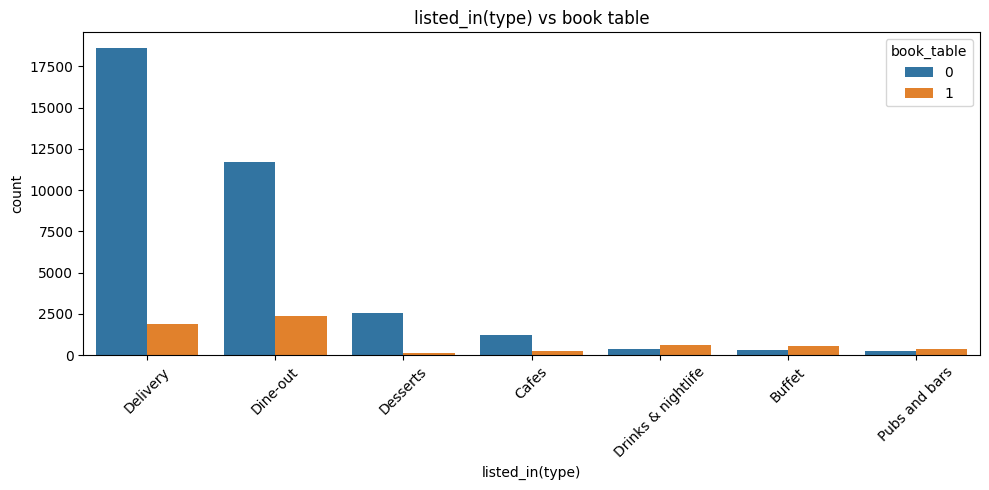

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=cleaned_zomato_data,x = 'listed_in(type)',hue='book_table',order=cleaned_zomato_data['listed_in(type)'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("listed_in(type) vs book table")
plt.tight_layout()
plt.show()

🎯 Insight: This shows which restaurant types usually support table booking and which don't.

 Categorical vs Numerical

Let’s see how the average rating or votes varies by restaurant type or booking option.

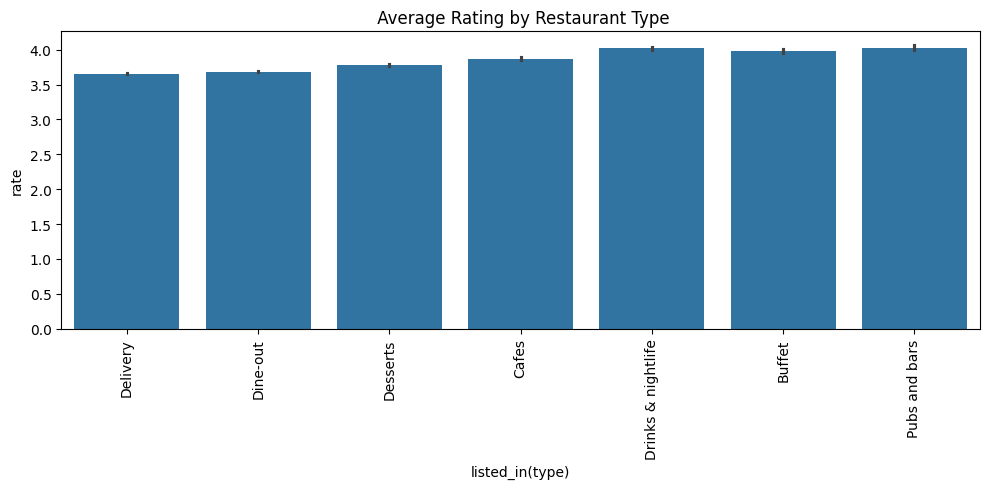

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=cleaned_zomato_data, x='listed_in(type)', y='rate',order=cleaned_zomato_data['listed_in(type)'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title(" Average Rating by Restaurant Type")
plt.tight_layout()
plt.show()

rate by online_order 

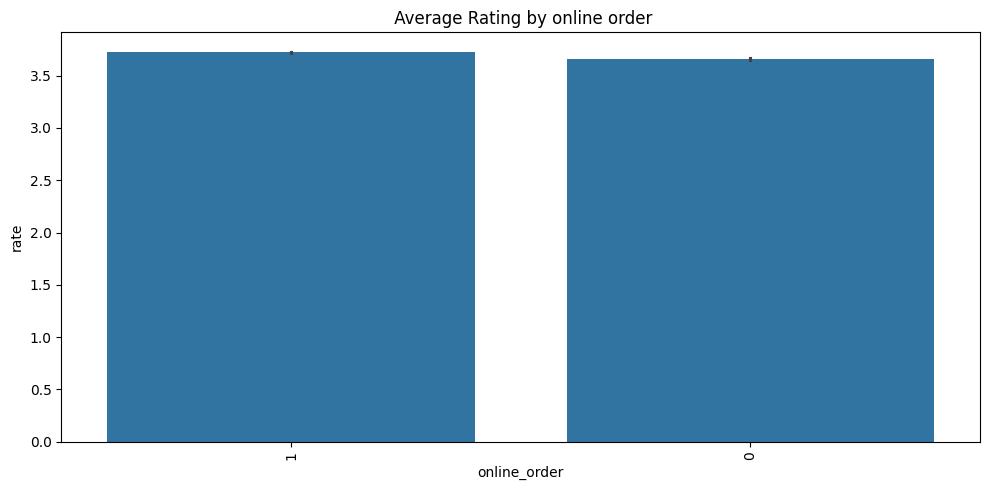

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(data=cleaned_zomato_data, x='online_order', y='rate',order=cleaned_zomato_data['online_order'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title(" Average Rating by online order")
plt.tight_layout()
plt.show()

rate by book_table

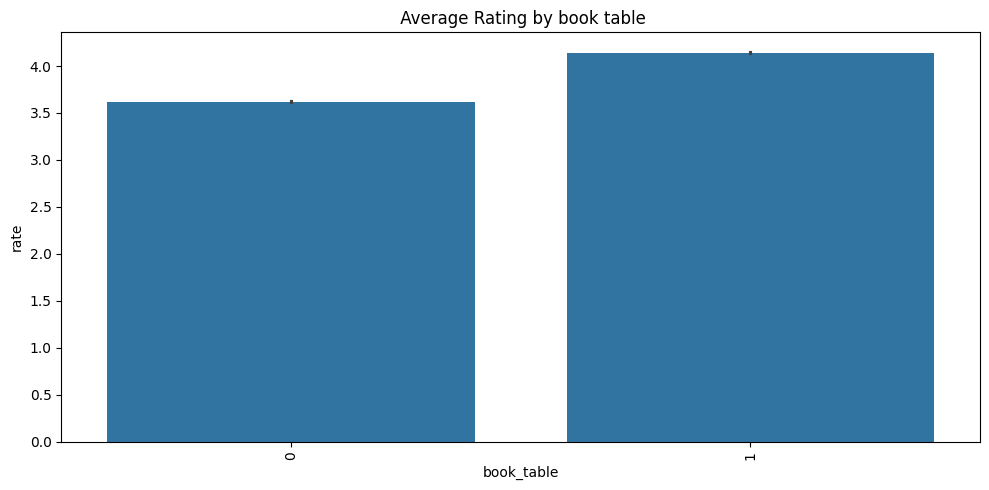

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(data=cleaned_zomato_data, x='book_table', y='rate',order=cleaned_zomato_data['book_table'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title(" Average Rating by book table")
plt.tight_layout()
plt.show()

votes by rest_type 

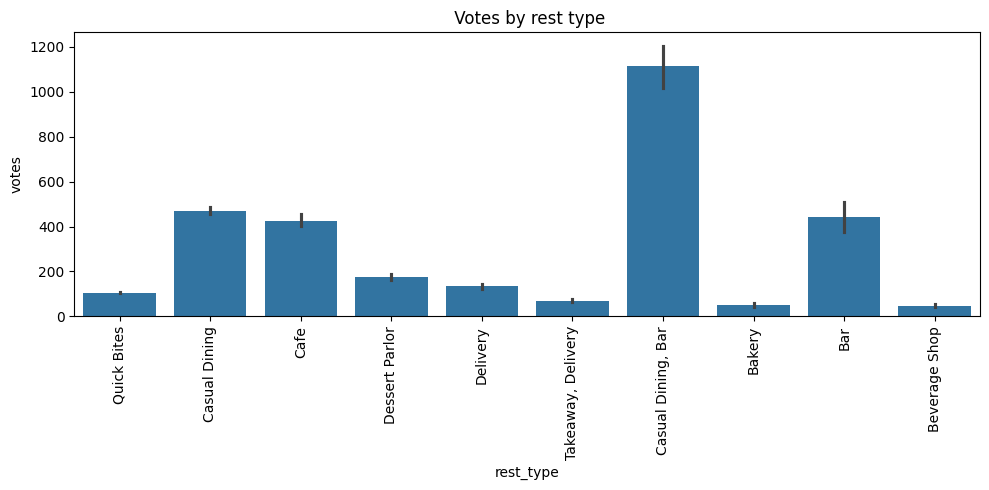

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=cleaned_zomato_data, x='rest_type', y='votes',order=cleaned_zomato_data['rest_type'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title(" Votes by rest type")
plt.tight_layout()
plt.show()

votes by  location

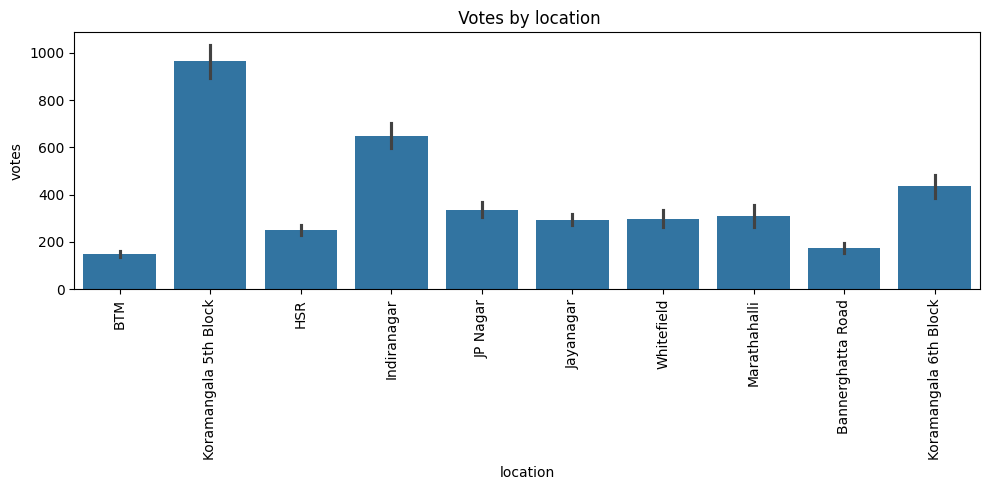

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(data=cleaned_zomato_data, x='location', y='votes',order=cleaned_zomato_data['location'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title(" Votes by location")
plt.tight_layout()
plt.show()

Numerical vs Numerical

We’ll now see if numbers relate to each other — like votes and ratings.

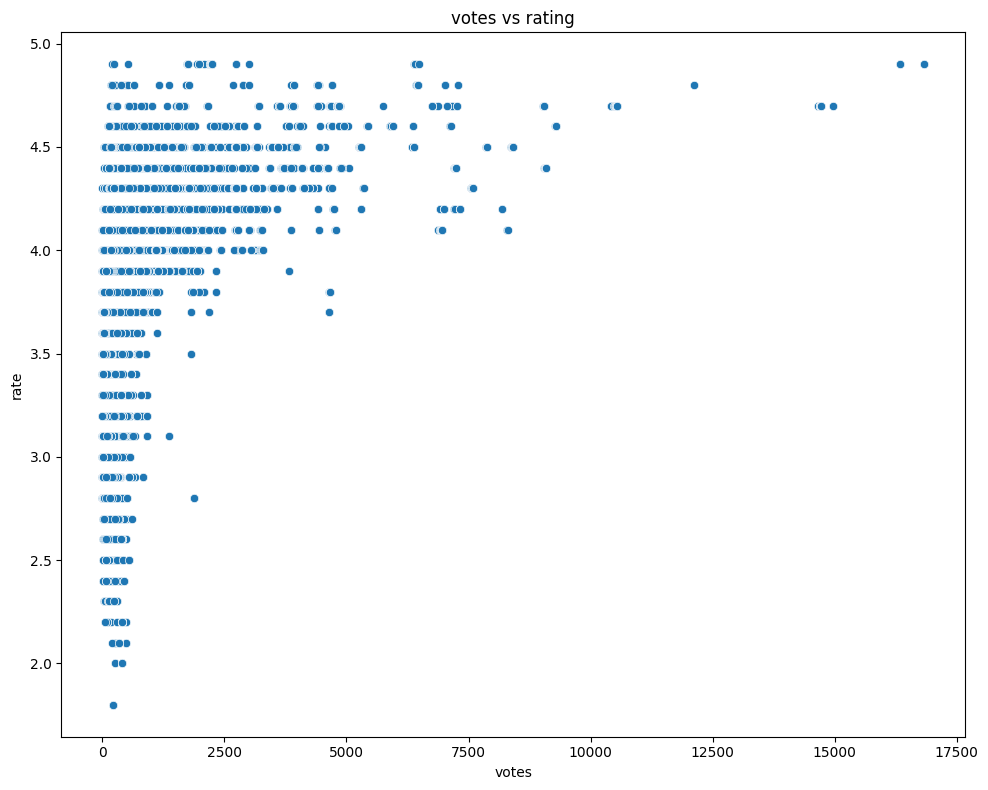

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=cleaned_zomato_data,x = 'votes',y='rate')
plt.title("votes vs rating")
plt.tight_layout()
plt.show()

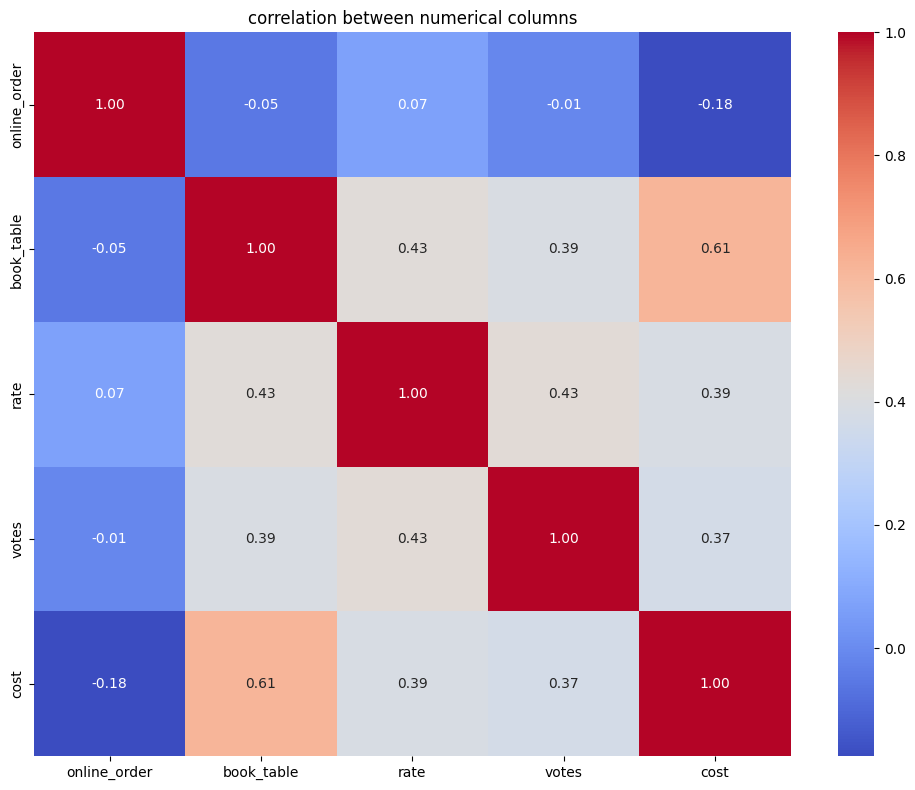

In [42]:
num_col = cleaned_zomato_data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,8))
sns.heatmap(num_col.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("correlation between numerical columns")
plt.tight_layout()
plt.show()

 Multivariate Plot 1:
Restaurant Type vs Rating by Online Order
(Do online ordering restaurants get better ratings in each type?)

python
Copy
Edit


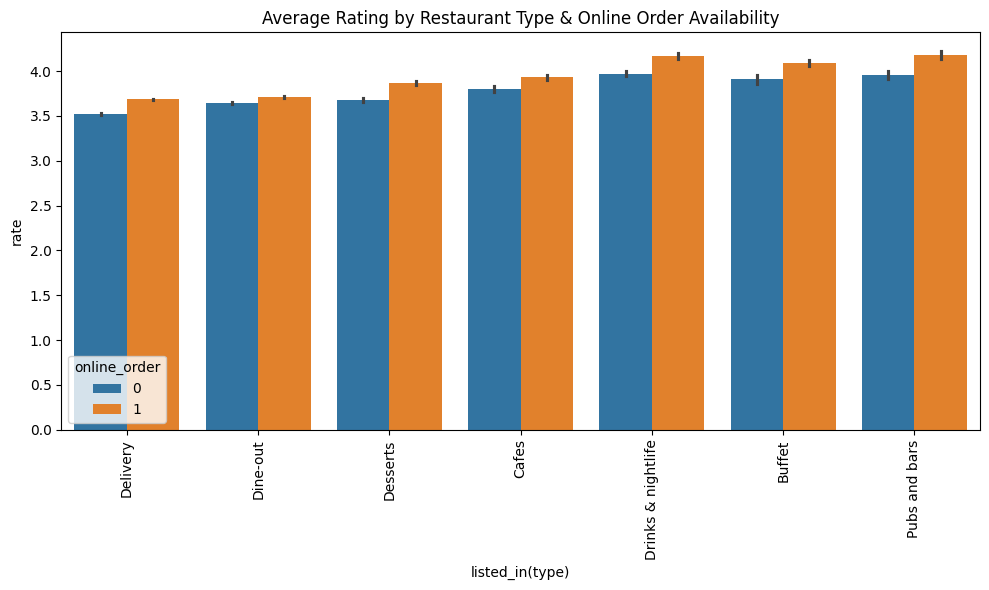

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=cleaned_zomato_data,x='listed_in(type)', y='rate', hue='online_order',order=cleaned_zomato_data['listed_in(type)'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Average Rating by Restaurant Type & Online Order Availability")
plt.tight_layout()
plt.show()

 Insight: You’ll see if online-order-enabled outlets are consistently rated better across types.

 Multivariate Plot 2:
Top Locations vs Rating by Table Booking Option

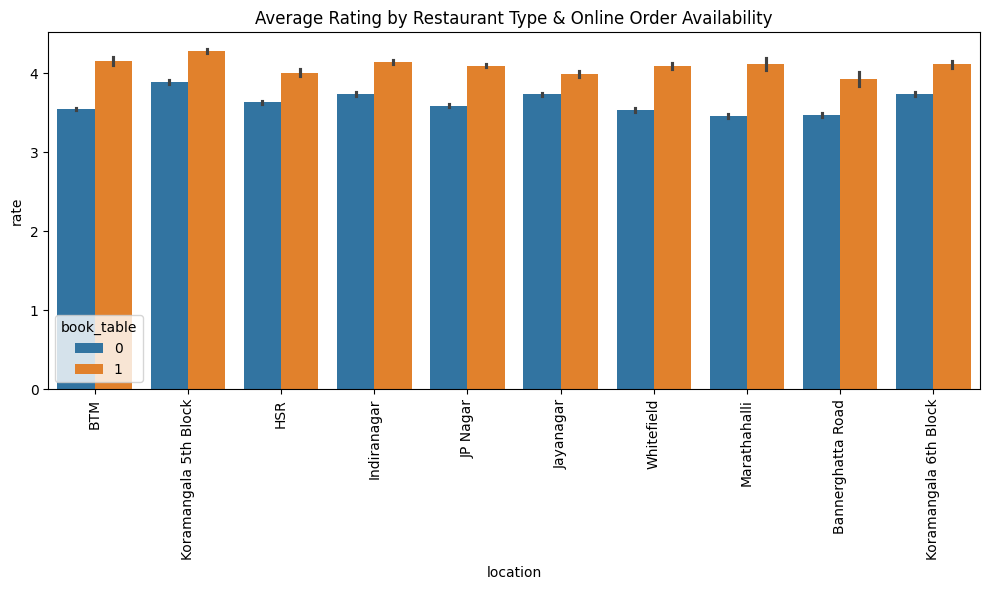

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=cleaned_zomato_data,x='location', y='rate', hue='book_table',order=cleaned_zomato_data['location'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Average Rating by Restaurant Type & Online Order Availability")
plt.tight_layout()
plt.show()

Insight: Helps answer does offering table booking affect ratings in top locations?



In [45]:
cleaned_zomato_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


Detecting and Removing Outliers

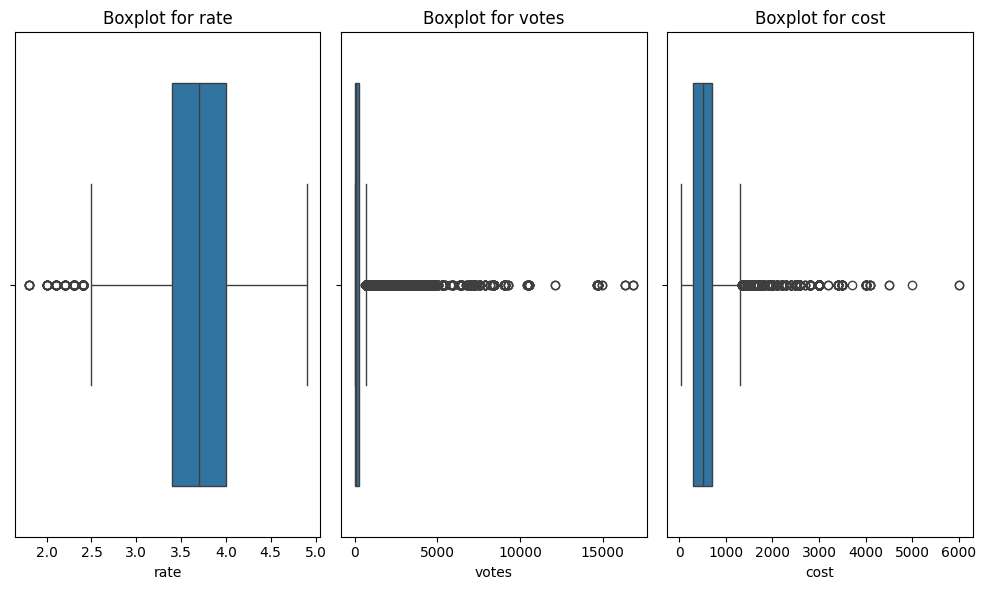

In [46]:
num_col = ['rate', 'votes', 'cost']
cols_per_row = 3
rows = math.ceil(len(num_col)/cols_per_row)
fig,axis = plt.subplots(rows,cols_per_row,figsize=(10,6))
axis = axis.flatten()
for i,col in enumerate(num_col):
      sns.boxplot(data=cleaned_zomato_data,x = col,ax = axis[i])
      axis[i].set_title(f"Boxplot for {col}")

for j in range(len(num_col),len(axis)):
      fig.delaxes(axis[j])

plt.tight_layout()
plt.show()            

Outlier Detection & Removal Using IQR

In [47]:
def remove_outliers(cleaned_zomato_data,col):
      q1 = cleaned_zomato_data[col].quantile(0.25)
      q3 = cleaned_zomato_data[col].quantile(0.75)
      IQR = q3-q1
      lower_limit = q1 - 1.5*IQR
      upper_limit = q3 + 1.5* IQR
      return cleaned_zomato_data[(cleaned_zomato_data[col]>= lower_limit)& (cleaned_zomato_data[col]<=upper_limit)]

for col in num_col:
      cleaned_zomato_data = remove_outliers(cleaned_zomato_data,col)
      
print(f"Shape of the data after removing outliers: {cleaned_zomato_data.shape}")      

Shape of the data after removing outliers: (33236, 11)


Box Plot Visualization After Removing Outliers

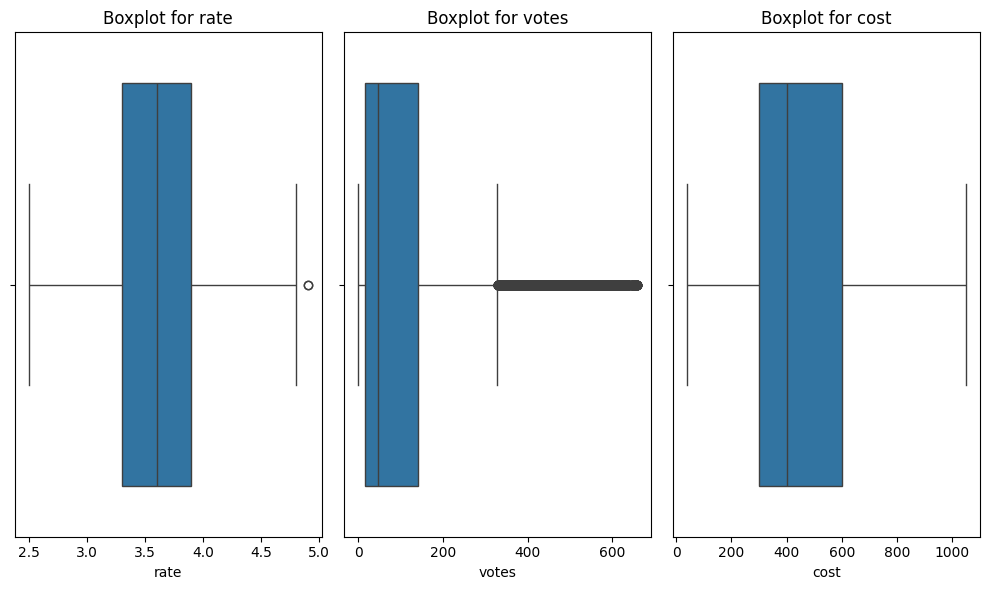

In [48]:
num_col = ['rate', 'votes', 'cost']
cols_per_row = 3
rows = math.ceil(len(num_col)/cols_per_row)
fig,axis = plt.subplots(rows,cols_per_row,figsize=(10,6))
axis = axis.flatten()
for i,col in enumerate(num_col):
      sns.boxplot(data=cleaned_zomato_data,x = col,ax = axis[i])
      axis[i].set_title(f"Boxplot for {col}")

for j in range(len(num_col),len(axis)):
      fig.delaxes(axis[j])

plt.tight_layout()
plt.show()  

6.Feature Engineering

 a) total_cuisines – Number of cuisines offered by the restaurent

In [49]:
cleaned_zomato_data['total_cuisines'] =cleaned_zomato_data['cuisines'].apply(lambda x : len(x.split(',')))

b) is_buffet – Is it a buffet type restaurant (1/0)

In [50]:
cleaned_zomato_data['is_buffet'] = cleaned_zomato_data['listed_in(type)'].apply(lambda x : 1 if 'Buffet' in x else 0)

c) price_per_person – Dividing cost for 2 by 2

In [51]:
cleaned_zomato_data['price_per_person'] = cleaned_zomato_data['cost'] / 2

 d) Bucket ratings into categories (for classification)
 We define a function rating_bucket that classifies ratings into categories:

  High: Rating greater than or equal to 4.0

  Medium: Rating between 3.0 and 4.0

  Low: Rating less than 3.0

In [52]:
def rating_bucket(r):
      if r >= 4:
            return 'High'
      elif r >= 3:
            return 'Medium'
      else:
            return 'Low'
cleaned_zomato_data['rating_bucket'] = cleaned_zomato_data['rate'].apply(rating_bucket)      

In [53]:
cleaned_zomato_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,listed_in(type),listed_in(city),total_cuisines,is_buffet,price_per_person,rating_bucket
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,2,1,150.0,Medium
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,2,1,300.0,Medium
5,Timepass Dinner,1,0,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,Banashankari,1,1,300.0,Medium
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet,Banashankari,4,1,400.0,Medium
8,Penthouse Cafe,1,0,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,Cafes,Banashankari,3,0,350.0,High


7.Perform Each Statistical Test

Question
1.Do restaurants with online ordering have different ratings than those without?

	H₀ (Null Hypothesis):μ₍online₎ = μ₍offline₎,H₁ (Alternate Hypothesis):μ₍online₎ ≠ μ₍offline₎,(Test Type:Two‑Sample T‑Test)




Null Hypothesis (H₀):
The average rating of restaurants with online ordering is equal to that of those without online ordering.

Alternative Hypothesis (H₁):
The average ratings are not equal.

In [54]:
from scipy.stats import ttest_ind

online = cleaned_zomato_data[cleaned_zomato_data['online_order']==1]['rate']
offline = cleaned_zomato_data[cleaned_zomato_data['online_order']==0]['rate']

t_stat,p_val = ttest_ind(online,offline,equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 28.284398558740378
P-value: 1.0458861704884418e-172


Conclusion (at 5% significance level α = 0.05):
Since P-value < 0.05, we reject the null hypothesis.

This means there is a statistically significant difference in average ratings between restaurants that accept online orders and those that don’t.

Using an independent T-test, we compared the ratings of restaurants that allow online ordering versus those that don't. The p-value was almost zero, strongly suggesting a significant difference in the average ratings. Hence, we reject the null hypothesis and conclude that online ordering does influence restaurant ratings



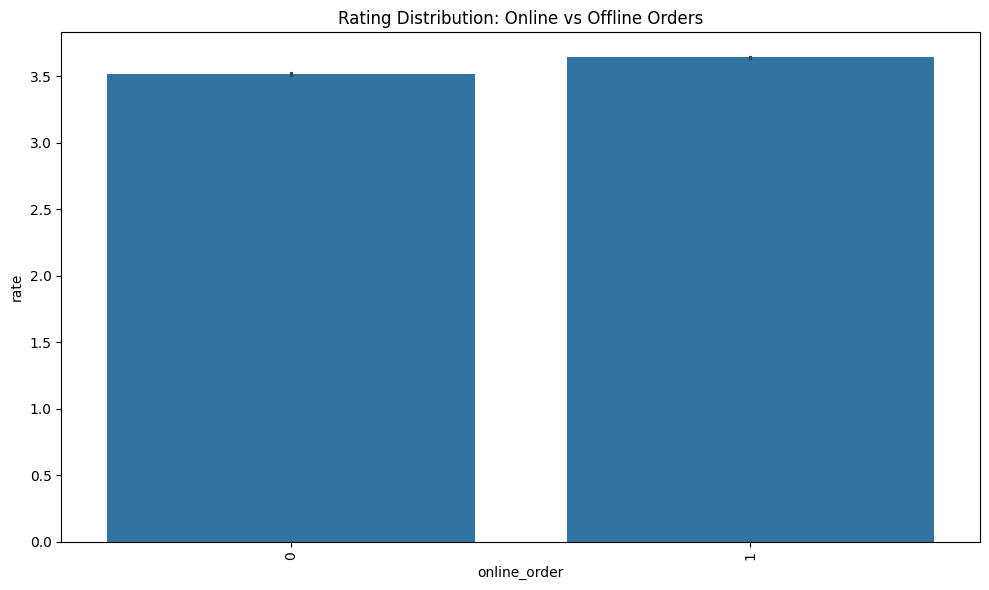

In [55]:
#Let’s plot a boxplot comparing ratings for restaurants with and without online ordering.

plt.figure(figsize=(10,6))
sns.barplot(x='online_order', y='rate',data=cleaned_zomato_data)
plt.title('Rating Distribution: Online vs Offline Orders')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()



2.Do restaurants that allow table booking have different ratings than those that don’t?

      H₀ (Null Hypothesis):μ₍book₎ = μ₍no_book₎,H₁ (Alternate Hypothesis):μ₍book₎ ≠ μ₍no_book₎,(Test Type:Two‑Sample T‑Test)

Null Hypothesis (H₀):
The average rating of restaurants that allow table booking is equal to those that don’t.

Alternative Hypothesis (H₁):
The average ratings are not equal

In [56]:
from scipy.stats import ttest_ind

book_table = cleaned_zomato_data[cleaned_zomato_data['book_table']==1]['rate']
no_book_table = cleaned_zomato_data[cleaned_zomato_data['book_table']==0]['rate']

t_stat,p_val = ttest_ind(book_table,no_book_table,equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 44.737041069136154
P-value: 1.365467387713243e-291


Interpretation:

Since the p-value is far less than 0.05, we reject the null hypothesis.

That means there is a significant difference in the average ratings between restaurants that allow table booking and those that do not.

We wanted to know whether table booking impacts customer ratings. So, we compared the mean ratings of restaurants that allow table booking vs those that don’t using an Independent T-test.
The result gave us a very high T-statistic (44.74) and a p-value close to zero, which clearly indicates that there is a statistically significant difference in the average ratings of the two groups

Suggestions:

“This might suggest that the ability to book tables could enhance the customer experience, leading to better ratings.”

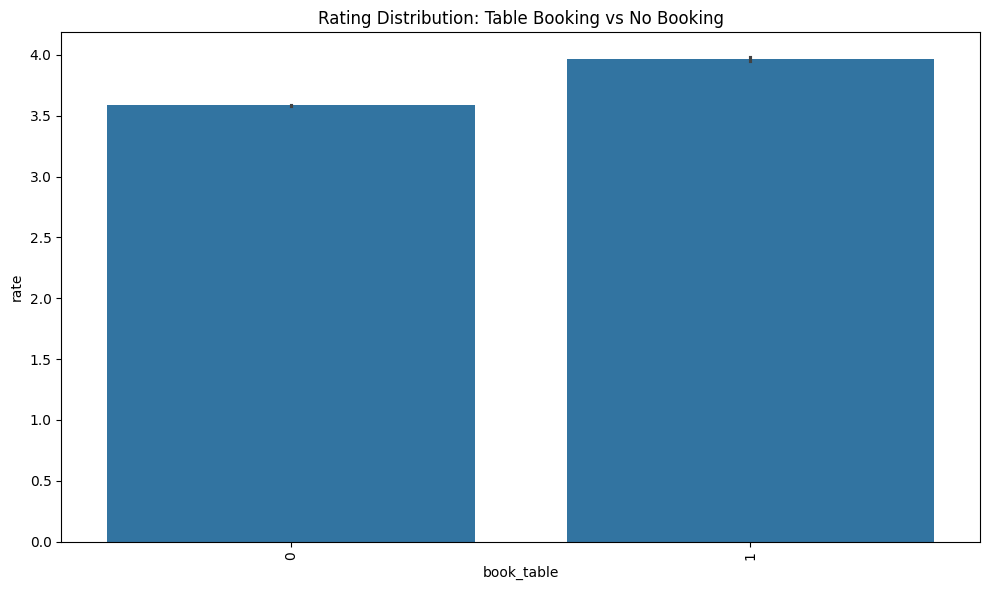

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x='book_table', y='rate',data=cleaned_zomato_data)
plt.title('Rating Distribution: Table Booking vs No Booking')
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

Question 3:

Is the overall mean rating > 3.5? | μ = 3.5 | μ > 3.5 | One‑Sample Z‑Test

In [58]:
from scipy.stats import  ttest_ind
from scipy.stats import norm


rating = cleaned_zomato_data['rate']

h0 = 3.5
sample_mean = rating.mean()
sample_std = rating.std()
n = len(rating)

z = (sample_mean - h0) / (sample_std / np.sqrt(n))

p_value = 1 - norm.cdf(z)

print("Z-statistic:", z)
print("P-value:", p_value)

Z-statistic: 48.03381567872308
P-value: 0.0


Z-statistic: 48.03 — this is very high, meaning your sample mean is far above the hypothesized 3.5.

P-value: 0.0 — practically 0, meaning the result is statistically significant.

Since the p-value is less than 0.05, we reject the null hypothesis.

Interpretation:

The average restaurant rating is significantly greater than 3.5.

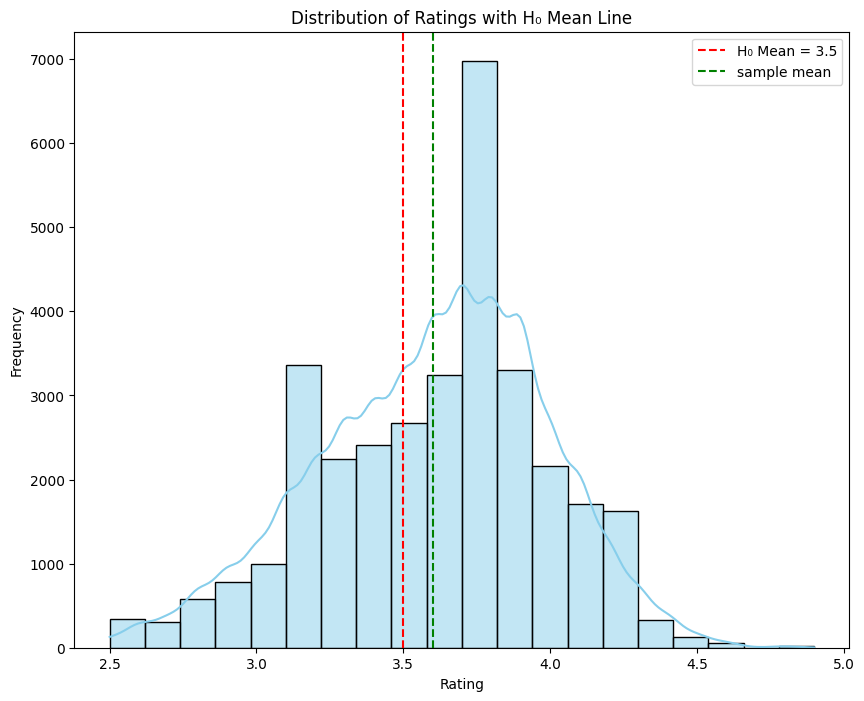

In [59]:
#This is a one-sample Z-test — to visualize it, we can plot the distribution of ratings and mark the hypothesized mean (3.5):

plt.figure(figsize=(10,8))
sns.histplot(cleaned_zomato_data['rate'],kde=True,bins=20,color='skyblue')
plt.axvline(3.5,color='red',linestyle='--',label='H₀ Mean = 3.5')
plt.axvline(cleaned_zomato_data['rate'].mean(),color = 'green',linestyle= '--',label = 'sample mean')
plt.title('Distribution of Ratings with H₀ Mean Line')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Interpretation: You can visually see how the ratings are distributed in relation to the null hypothesis mean. If the sample mean (green line) is significantly higher than the red dashed line, it suggests that the sample mean may be greater than 3.5, supporting the alternate hypothesis.

Question 4:
Q: Is the proportion of “High” rated (≥4.0) restaurants larger among buffets than non‑buffets?

H₀: p₍buffet₎ = p₍non‑buffet₎

H₁: p₍buffet₎ > p₍non‑buffet₎

Test: Two-Proportion Z-Test

In [60]:
from statsmodels.stats.proportion import  proportions_ztest

buffet = cleaned_zomato_data[cleaned_zomato_data['is_buffet']==1]
non_buffet = cleaned_zomato_data[cleaned_zomato_data['is_buffet']==0]

buffet_high = (buffet['rate']>=4.0).sum()
non_buffet_high = (non_buffet['rate']>=4.0).sum()

n_buffet = len(buffet)
n_non_buffet = len(non_buffet)

counts = np.array([buffet_high,non_buffet_high])
nobs = np.array([n_buffet,n_non_buffet])

z_stat,p_val = proportions_ztest(counts,nobs,alternative='larger')

print("Z-statistic:", z_stat)
print("P-value:", p_val)


Z-statistic: -0.31206457652042696
P-value: 0.6225042765132626


 Interpretation:
Since p-value = 0.62 > 0.05, we fail to reject the null hypothesis.

This means:
There is no statistically significant evidence that buffet restaurants have a higher proportion of high ratings than non-buffet restaurants.

Why is Z-stat negative?
A negative z-score just means that buffet restaurants had fewer high ratings than non-buffet ones — opposite of what we were testing.

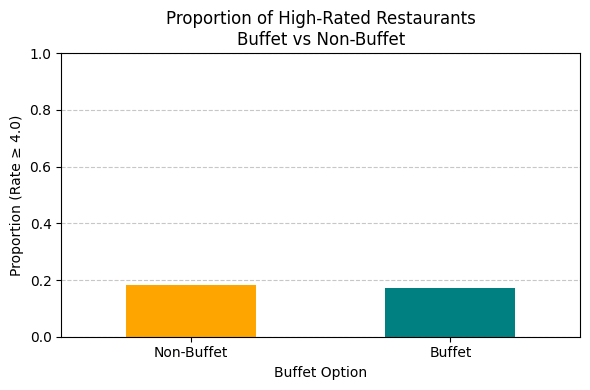

In [61]:
#lets plot the visualization 

cleaned_zomato_data['high_rating'] = (cleaned_zomato_data['rate'] >= 4.0).astype(int)

buffet_group = cleaned_zomato_data.groupby('is_buffet')['high_rating'].mean()

plt.figure(figsize=(6,4))
buffet_group.plot(kind='bar',color=['orange','teal'])
plt.xticks([0,1],['Non-Buffet', 'Buffet'],rotation = 0)
plt.title('Proportion of High-Rated Restaurants\nBuffet vs Non-Buffet')
plt.ylabel('Proportion (Rate ≥ 4.0)')
plt.xlabel('Buffet Option')
plt.ylim(0,1)
plt.grid(axis='y',linestyle ='--',alpha = 0.7)
plt.tight_layout()
plt.show()



Question 5: Are “book_table” and “online_order” choices independent?

In [62]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(cleaned_zomato_data['book_table'],cleaned_zomato_data['online_order'])
chi2,p,dof,expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("\nExpected Frequencies:\n", expected)


Chi-Square Statistic: 8.01968503208052
Degrees of Freedom: 1
P-value: 0.004627161683277687

Expected Frequencies:
 [[10019.18446865 21685.81553135]
 [  483.81553135  1047.18446865]]


 Result Interpretation

Chi-Square Statistic: 8.02
This tells us how far the observed values deviate from what we would expect if the two variables were independent.

Degrees of Freedom (df): 1
Calculated as (rows - 1) * (columns - 1) → (2 - 1)(2 - 1) = 1

 P-value: 0.0046
This is less than 0.05, which means we reject the null hypothesis

There is a statistically significant association between allowing table booking and having online ordering in restaurants. 🎯



Heatmap of Contingency Table

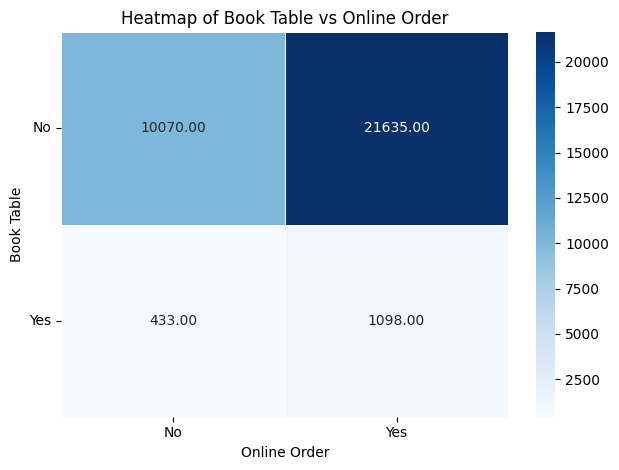

In [63]:
contingency_table = pd.crosstab(cleaned_zomato_data['book_table'],cleaned_zomato_data['online_order'])
plt.Figure(figsize=(10,10))
sns.heatmap(contingency_table,annot=True,cmap='Blues',fmt = '.2f',linewidths=0.5)
plt.title('Heatmap of Book Table vs Online Order')
plt.xlabel('Online Order')
plt.ylabel('Book Table')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

 create a stacked bar plot showing the relationship between book_table and online_order

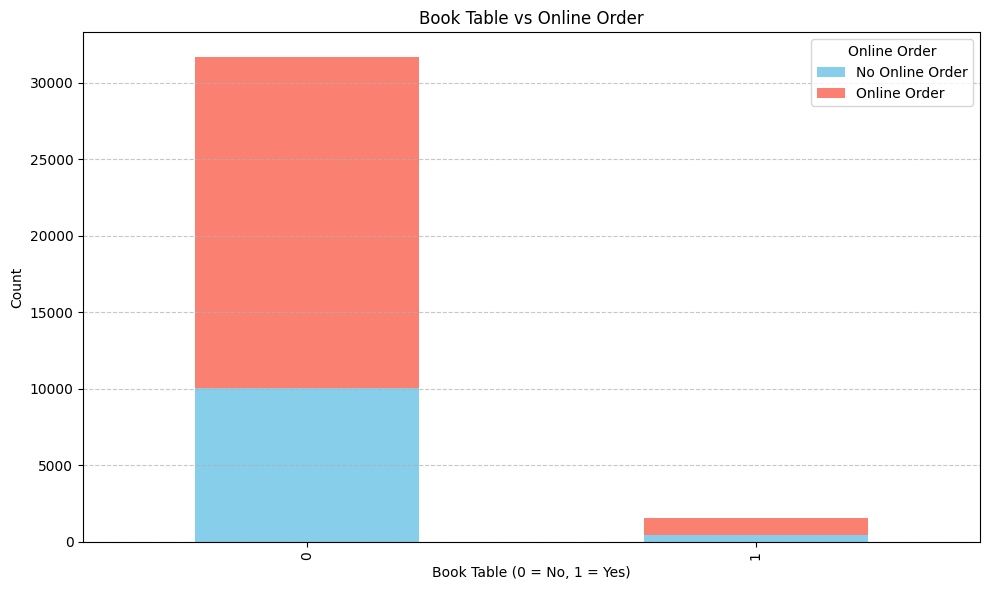

In [64]:
contingency_table = pd.crosstab(cleaned_zomato_data['book_table'],cleaned_zomato_data['online_order'])
contingency_table.plot(kind='bar',stacked=True,color=['skyblue', 'salmon'],figsize=(10,6))
plt.title('Book Table vs Online Order')
plt.xlabel('Book Table (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(['No Online Order', 'Online Order'], title='Online Order')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

Restaurants that offer table booking are more likely to also support online ordering. The Chi-Square test confirms a significant association between the two services, suggesting they often go together.

Question 5:
Is there a significant association between the location of the restaurant and whether it accepts online orders?

In [65]:
contingency_table = pd.crosstab(cleaned_zomato_data['location'],cleaned_zomato_data['online_order'])
chi2,p,dof,expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("\nExpected Frequencies:\n", expected)


Chi-Square Statistic: 1644.3609292686092
Degrees of Freedom: 91
P-value: 2.640792355637566e-283

Expected Frequencies:
 [[1.16640309e+03 2.52459691e+03]
 [2.08884433e+02 4.52115567e+02]
 [1.42521754e+02 3.08478246e+02]
 [3.56146377e+02 7.70853623e+02]
 [1.79495246e+02 3.88504754e+02]
 [3.91855819e+01 8.48144181e+01]
 [2.74615086e+02 5.94384914e+02]
 [4.04496329e+01 8.75503671e+01]
 [2.41749759e+02 5.23250241e+02]
 [1.47893970e+02 3.20106030e+02]
 [1.92767782e+01 4.17232218e+01]
 [2.52810206e+00 5.47189794e+00]
 [8.12152786e+01 1.75784721e+02]
 [2.37009568e+01 5.12990432e+01]
 [8.27953424e+01 1.79204658e+02]
 [8.91155975e+01 1.92884402e+02]
 [9.51198399e+01 2.05880160e+02]
 [8.53234445e+00 1.84676556e+01]
 [8.08992659e+01 1.75100734e+02]
 [2.31637351e+02 5.01362649e+02]
 [1.65906698e+02 3.59093302e+02]
 [2.93891864e+01 6.36108136e+01]
 [5.56814478e+02 1.20518552e+03]
 [2.52810206e+00 5.47189794e+00]
 [3.60254543e+01 7.79745457e+01]
 [1.61166506e+01 3.48833494e+01]
 [2.27529185e+01 4.924

Interpretation:
The p-value is far less than 0.05.

So, we reject the null hypothesis.

Conclusion:
There is a significant association between location and online ordering.



stacked bar chart for Location vs Online Order

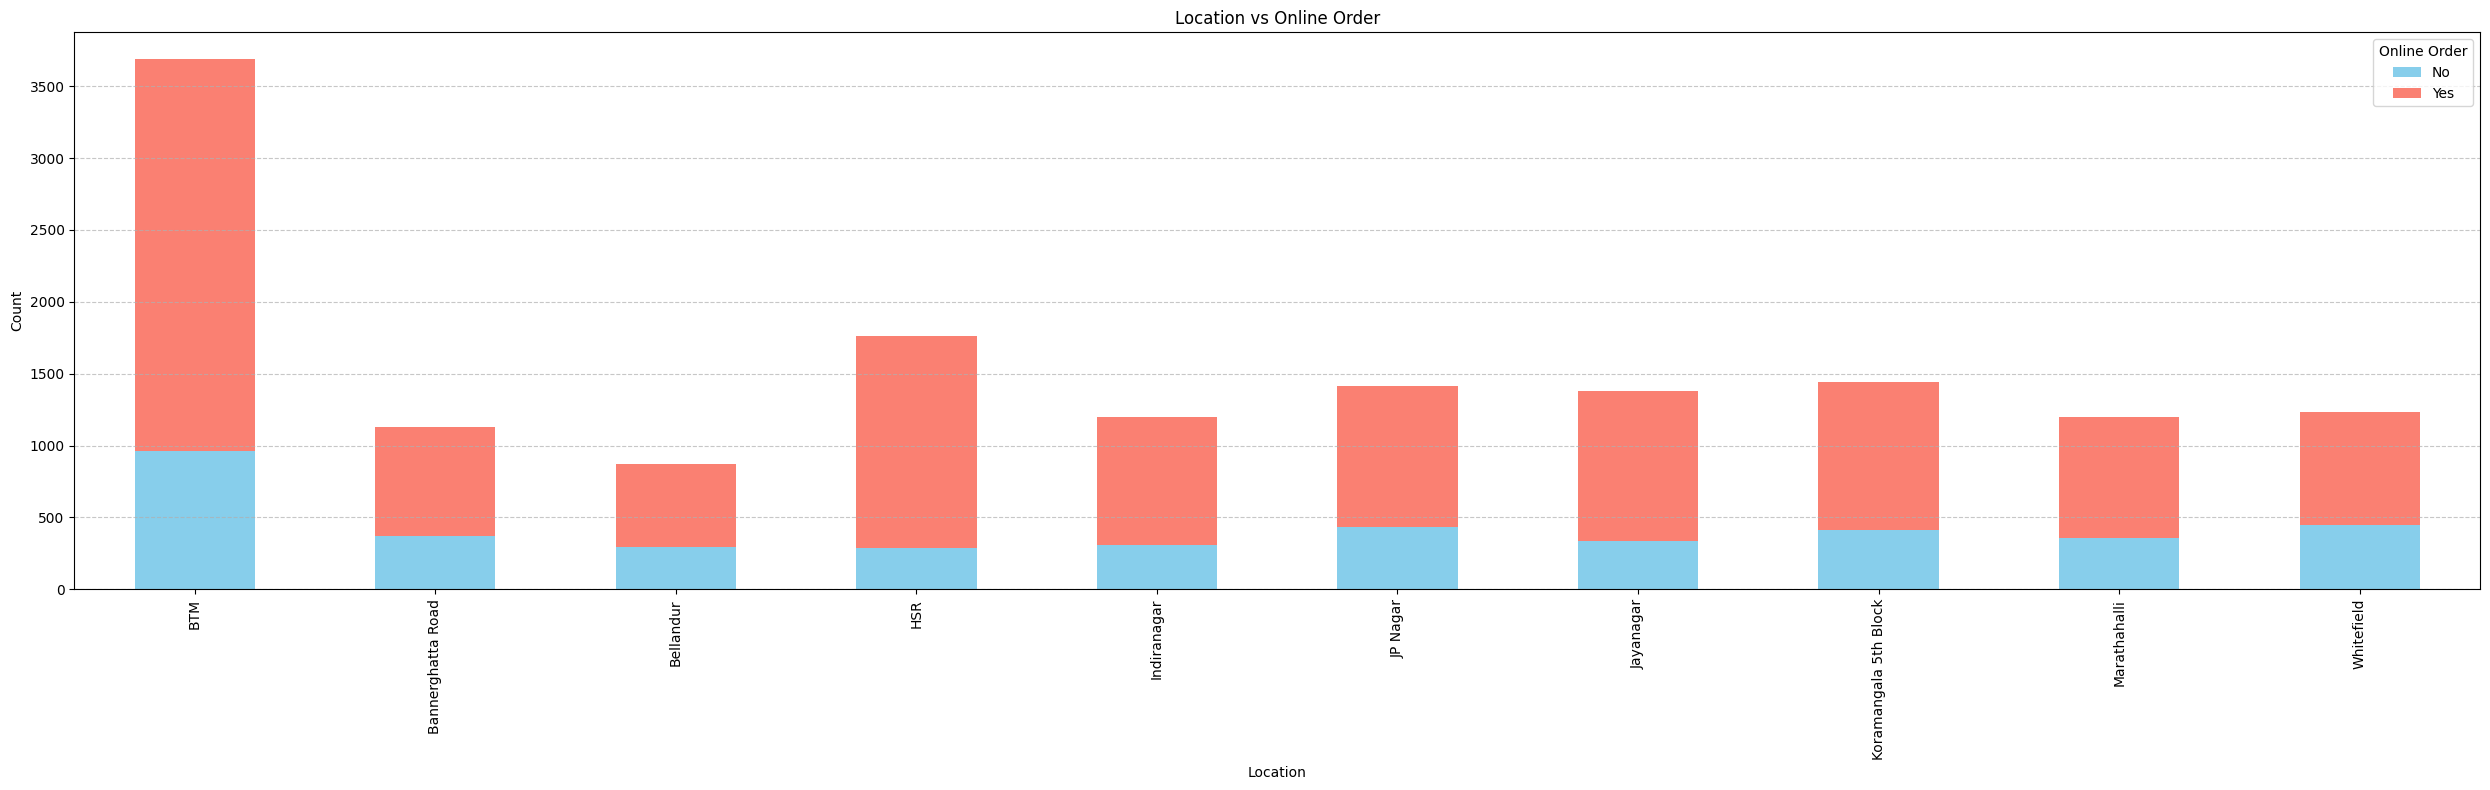

In [66]:
top_types = cleaned_zomato_data['location'].value_counts().nlargest(10).index
contingency_table = pd.crosstab(cleaned_zomato_data[cleaned_zomato_data['location'].isin(top_types)]['location'],cleaned_zomato_data['online_order'])

contingency_table.plot(kind='bar',stacked=True,color=['skyblue', 'salmon'],figsize=(25,8))

plt.title('Location vs Online Order')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Online Order',labels=['No','Yes'])
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Question-6: "Is there a significant association between Restaurant Type and Online Order?"

In [67]:
contingency_table = pd.crosstab(cleaned_zomato_data['rest_type'],cleaned_zomato_data['online_order'])

chi2,p,dof,expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("\nExpected Frequencies:\n", expected)


Chi-Square Statistic: 1570.318401991142
Degrees of Freedom: 66
P-value: 1.762842581889091e-284

Expected Frequencies:
 [[2.20576905e+02 4.77423095e+02]
 [3.16012757e-01 6.83987243e-01]
 [1.01124082e+01 2.18875918e+01]
 [4.01336202e+01 8.68663798e+01]
 [6.32025515e-01 1.36797449e+00]
 [7.04708449e+01 1.52529155e+02]
 [7.14188831e+01 1.54581117e+02]
 [1.99088037e+01 4.30911963e+01]
 [1.58006379e+00 3.41993621e+00]
 [2.01616139e+02 4.36383861e+02]
 [8.84835720e+00 1.91516428e+01]
 [2.37009568e+01 5.12990432e+01]
 [7.48950235e+01 1.62104977e+02]
 [9.48038272e-01 2.05196173e+00]
 [8.51022355e+02 1.84197764e+03]
 [4.10816584e+01 8.89183416e+01]
 [2.46489951e+01 5.33510049e+01]
 [2.97051992e+01 6.42948008e+01]
 [6.32025515e-01 1.36797449e+00]
 [4.74019136e+00 1.02598086e+01]
 [2.62290589e+01 5.67709411e+01]
 [2.14604263e+03 4.64495737e+03]
 [6.98388194e+01 1.51161181e+02]
 [3.31813395e+01 7.18186605e+01]
 [2.52810206e+00 5.47189794e+00]
 [6.63626790e+00 1.43637321e+01]
 [1.26405103e+00 2.7359

Chi-Square Test: Restaurant Type vs Online Order

Chi-Square Statistic: 1570.32
This large value suggests a strong difference between observed and expected values for some restaurant types.

Degrees of Freedom: 66
Meaning there are many combinations of restaurant types and online order options.

P-value: 1.76e-284
This is essentially 0 — way smaller than any usual threshold like 0.05 or 0.01.

Interpretation:
There is a statistically significant association between restaurant type and online order preference.

In [68]:
cleaned_zomato_data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'listed_in(type)', 'listed_in(city)',
       'total_cuisines', 'is_buffet', 'price_per_person', 'rating_bucket',
       'high_rating'],
      dtype='object')

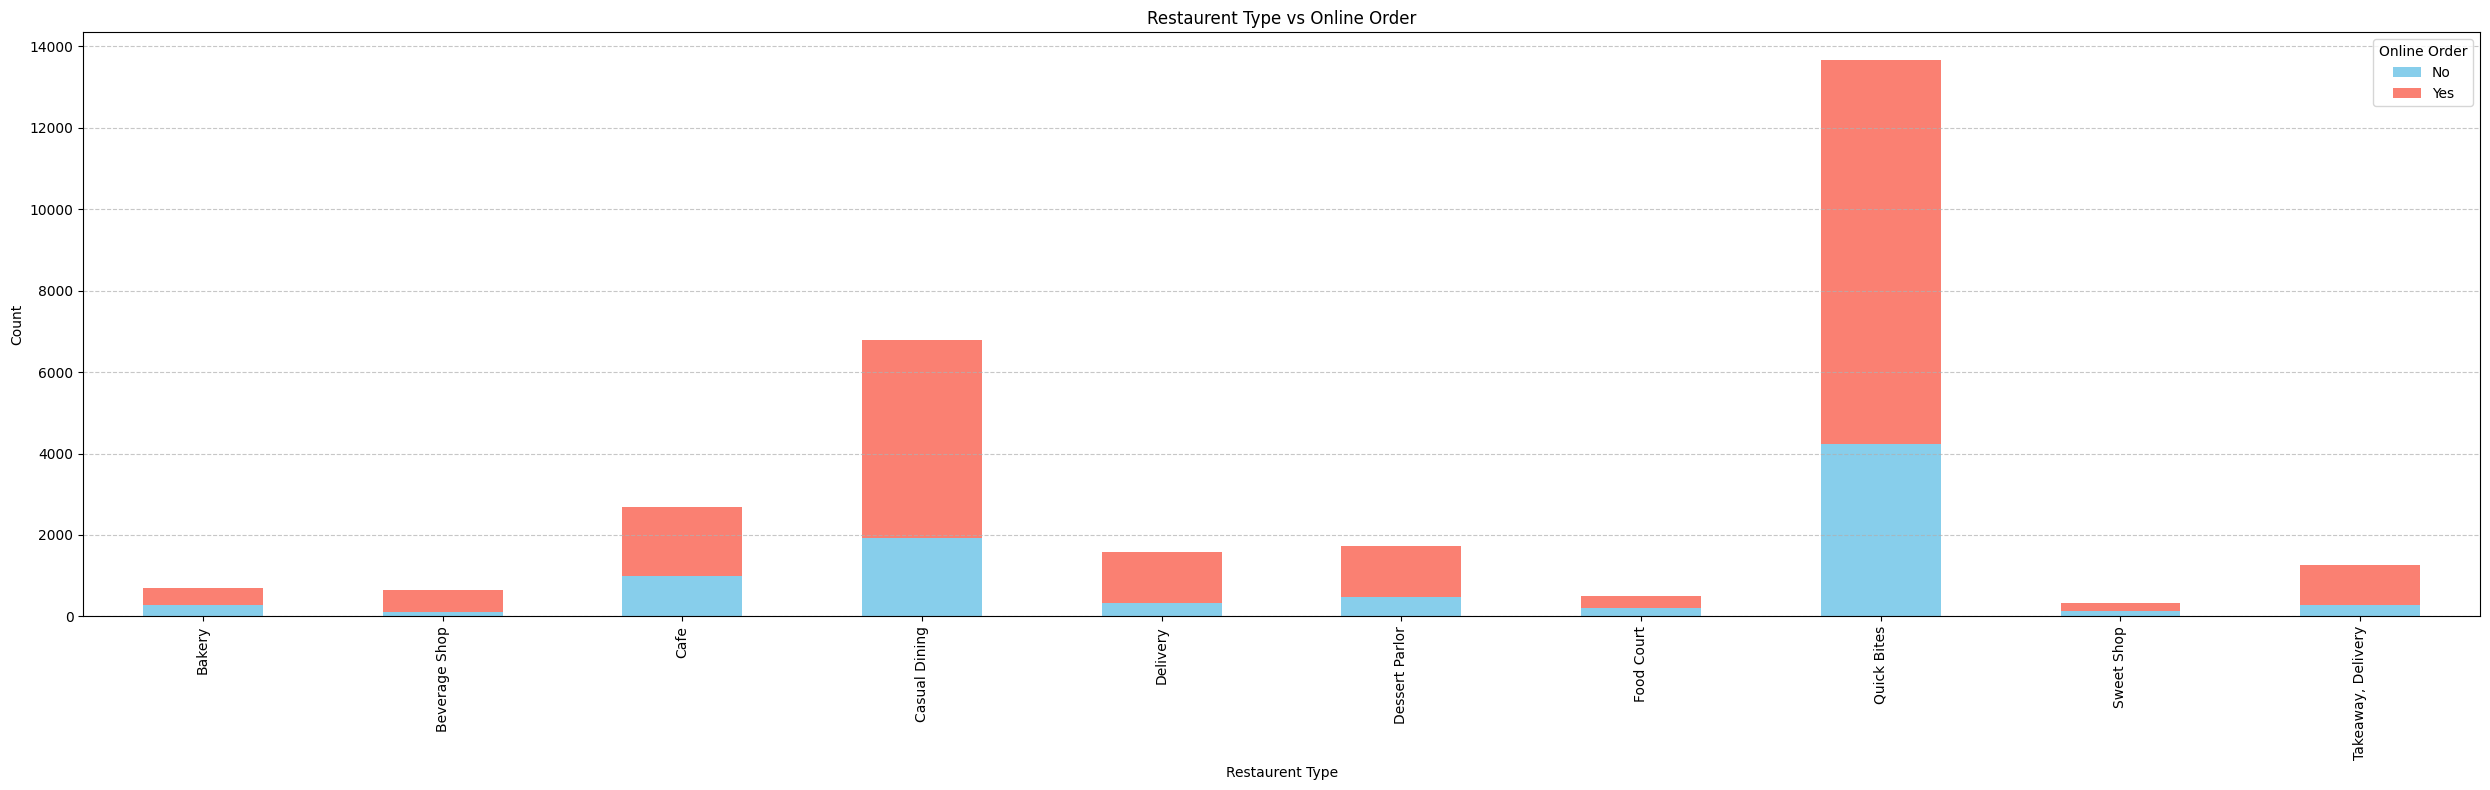

In [69]:
top_types = cleaned_zomato_data['rest_type'].value_counts().nlargest(10).index
contingency_table = pd.crosstab(cleaned_zomato_data[cleaned_zomato_data['rest_type'].isin(top_types)]['rest_type'],cleaned_zomato_data['online_order'])

contingency_table.plot(kind='bar',stacked=True,color=['skyblue', 'salmon'],figsize=(25,8))

plt.title('Restaurent Type vs Online Order')
plt.xlabel('Restaurent Type')
plt.ylabel('Count')
plt.legend(title='Online Order',labels=['No','Yes'])
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Question 6 - Do mean ratings differ across the top 5 location groups? | All μᵢ equal | At least one μᵢ differs | One‑Way ANOVA


Hypotheses

Null Hypothesis (H₀): All 5 locations have the same average rating.

Alternate Hypothesis (H₁): At least one location has a different average rating.

In [70]:
from scipy.stats import f_oneway

top_5_locations = cleaned_zomato_data['location'].value_counts().nlargest(5).index
top_5 = cleaned_zomato_data[cleaned_zomato_data['location'].isin(top_5_locations)]
group_rating = [top_5[top_5['location']==loc]['rate'] for loc in top_5_locations]   #This will create 5 separate groups of ratings – one for each top location.

f_stat,p_val = f_oneway(*group_rating)

print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 198.95211421077556
P-value: 3.140160605166693e-164


Since P-value < 0.05, we reject the null hypothesis.

Interpretation: There is a significant difference in average ratings across the top 5 locations.



Question 7:
Is there a correlation between number of votes and rating?

Hypotheses:

Null Hypothesis (H₀): ρ(votes, rate) = 0 (No correlation)

Alternative Hypothesis (H₁): ρ(votes, rate) ≠ 0 (There is a correlation)

In [71]:
#Test to Use: Pearson Correlation Coefficient

from  scipy.stats import pearsonr

filter_data = cleaned_zomato_data[['rate','votes']].dropna()

corr_coef, p_val = pearsonr(filter_data['votes'],filter_data['rate'])

print("Pearson Correlation Coefficient:", corr_coef)
print("P-value:", p_val)

Pearson Correlation Coefficient: 0.43625772816759867
P-value: 0.0


Pearson Correlation Coefficient (r) = 0.436

This indicates a moderate positive linear correlation between the number of votes and the rating.
→ As votes increase, ratings tend to increase moderately.

P-value = 0.0

This means the result is statistically significant (well below 0.05).
→ We reject the null hypothesis: There is a correlation.



Question 8. Does average price per person differ across rating categories (Low / Medium / High)?

Hypotheses:

Null Hypothesis (H₀): μₗₒw = μₘₑd = μₕᵢgₕ
(The mean average price per person is equal across the three rating categories)

Alternative Hypothesis (H₁): At least one group mean differs

Test Used: One-Way ANOVA

In [84]:
Low = cleaned_zomato_data[cleaned_zomato_data['rating_bucket']== 'Low']['price_per_person']
Medium = cleaned_zomato_data[cleaned_zomato_data['rating_bucket']== 'Medium']['price_per_person']
High = cleaned_zomato_data[cleaned_zomato_data['rating_bucket'] == 'High']['price_per_person']

from scipy.stats import f_oneway

f_stat, p_val = f_oneway(Low,Medium,High)
print("F-statistic:", f_stat)
print("P-value:", p_val)

F-statistic: 613.9915013280337
P-value: 1.4298759902677193e-262


Conclusion:

Since p-value < 0.05, we reject the null hypothesis.

 This means average price per person differs significantly across different rating categories.

Implication:

Higher-rated restaurants tend to charge more on average per person.

This can help customers decide based on budget vs quality.

Businesses can use this insight to strategically price based on expected rating tiers.

Question 10: Is there a correlation between total cuisines and rating?

Objective:
To check whether there's a linear relationship between:

total_cuisines (Number of cuisine types per restaurant – Numeric)

rate (Restaurant rating – Numeric)

Appropriate Test:

Pearson Correlation Coefficient
Use when both variables are numerical and continuous.

Hypotheses:
Null Hypothesis (H₀): ρ (correlation) = 0 → No correlation between number of cuisines and rating

Alternative Hypothesis (H₁): ρ ≠ 0 → There is a correlation

In [86]:
correlation,p_val = pearsonr(cleaned_zomato_data['total_cuisines'],cleaned_zomato_data['rate'])

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_val)

Pearson Correlation Coefficient: 0.1022484755885901
P-value: 6.089637070582457e-78


Result:
Pearson Correlation Coefficient: 0.102

P-value: 6.08e-78 (essentially 0, far less than 0.05)

Interpretation:
The correlation coefficient (0.102) is positive but very weak.

This means: As the number of cuisines increases, the rating tends to increase slightly, but the effect is not strong.

The P-value is extremely small, meaning:

The correlation, though weak, is statistically significant.

We reject the null hypothesis — there is a slight but real correlation.



Storytelling & Recommendations for Zomato Restaurant Analysis

1. Problem Statement

Zomato aims to improve its customer engagement and satisfaction by understanding the key factors that influence restaurant success. The goal is to analyze user behavior, preferences, and restaurant features that drive higher ratings and online orders.



2. Objectives

Identify trends in restaurant types, locations, and services.

Explore relationships between online ordering, table booking, ratings, and other factors.

Use statistical tests to validate significant relationships.

Provide actionable recommendations for restaurants and Zomato’s strategy.



 3. Key Findings (Backed by Analysis)
 Online Orders:
Fast food and casual dining types are highly preferred for online orders.

Chi-square test confirmed strong association between restaurant type and online ordering (p-value ≈ 0).

 Table Booking:

Restaurants offering table booking tend to receive higher ratings.

Chi-square test with rating categories showed significant dependency (p-value ≈ 0).

 Top Locations Differ in Mean Ratings:

ANOVA test confirmed statistical difference in ratings across top 5 locations.

Suggests that location significantly impacts customer satisfaction.

 Votes & Ratings Correlation:

Positive moderate correlation between number of votes and ratings (r = 0.43).

Suggests popular restaurants (more votes) tend to be better rated.

 Average Price vs Ratings:

ANOVA confirmed that average cost per person significantly differs among low, medium, and high rated restaurants.

Higher-rated restaurants might offer value-for-money or premium experiences.

 Cuisines Count vs Ratings:
 
Weak but statistically significant positive correlation between number of cuisines and ratings.

Suggests offering more variety slightly improves customer satisfaction.

4. Recommendations

 1. Encourage Online Ordering for Fast Food & Casual Dining
These formats are already highly preferred.

Zomato can promote combo deals, discounts, and faster delivery for these categories.

 2. Focus on High-Performing Locations
Locations like Koramangala and Indiranagar have higher ratings.

Zomato should focus more marketing, partnerships, and delivery logistics in these zones.

 3. Promote Table Booking in Mid-to-High End Restaurants
Strongly associated with higher ratings.

Restaurants should be encouraged to offer table booking through the app to improve customer experience.

 4. Boost Visibility of Highly Voted Restaurants
Votes correlate with ratings — Zomato can use this for ranking and promotion.

Feature “top-rated & most voted” badges.

 5. Diversify Cuisine Options
Though the correlation is weak, restaurants with more cuisines tend to do better.

Offering 3–4 cuisines could increase appeal.

 6. Highlight Value-for-Money Options
Cost per person significantly varies across rating levels.

Zomato should clearly display cost/value benefits to the user

 5. Final Summary
 
This end-to-end analysis provides data-driven insights into what makes a restaurant succeed on Zomato. Through exploratory analysis and hypothesis testing, we found clear associations between features like location, type, cost, services (online order/table booking), and customer feedback (ratings/votes).

